In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv(r"C:\Users\Ashutosh Thakur\Desktop\ML tuts\Dataset\iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [55]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

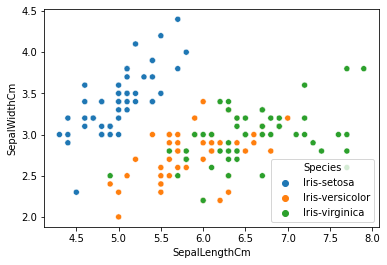

In [56]:
sns.scatterplot(x = df['SepalLengthCm'], y = df['SepalWidthCm'], hue = df['Species'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

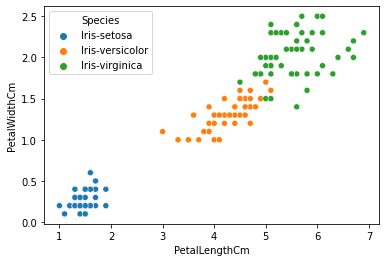

In [57]:
sns.scatterplot(x = df['PetalLengthCm'], y = df['PetalWidthCm'], hue = df['Species'])

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

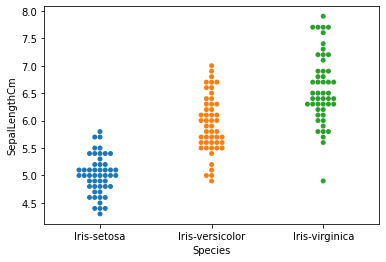

In [58]:
sns.swarmplot(x=df['Species'], y = df['SepalLengthCm'])

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

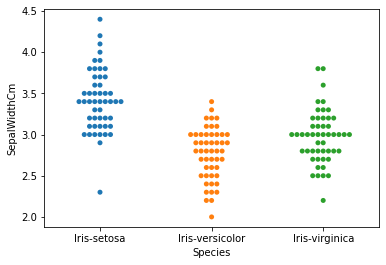

In [59]:
sns.swarmplot(x=df['Species'], y = df['SepalWidthCm'])

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

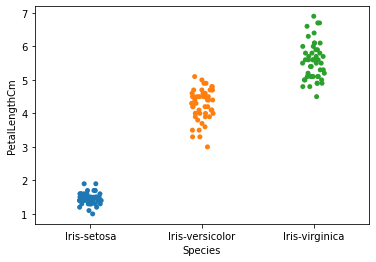

In [60]:
sns.stripplot(x=df['Species'], y = df['PetalLengthCm'])

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

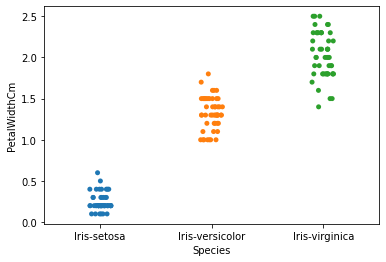

In [61]:
sns.stripplot(x=df['Species'], y = df['PetalWidthCm'])

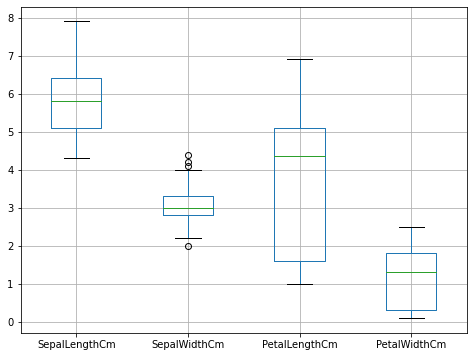

In [62]:
plt.figure(figsize=(8,6))
df.drop('Id',axis=1).boxplot()
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

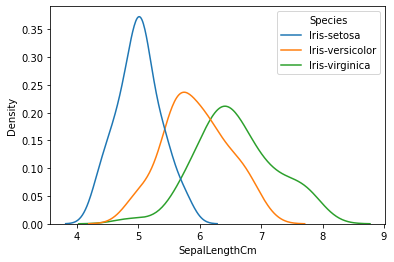

In [63]:
sns.kdeplot(data = df, x = 'SepalLengthCm', hue = 'Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

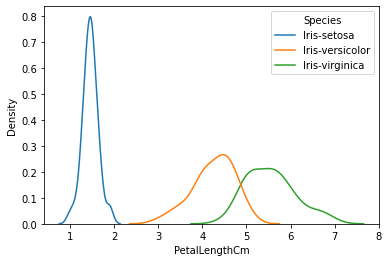

In [64]:
sns.kdeplot(data = df, x = 'PetalLengthCm', hue = 'Species')

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

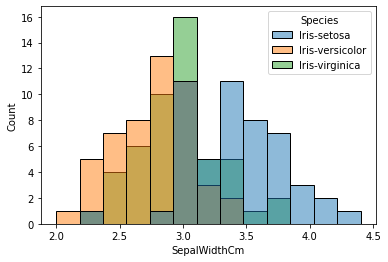

In [65]:
sns.histplot(data = df, x = 'SepalWidthCm',hue = 'Species')

In [66]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [67]:
df = df.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])

In [68]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train, y_test = train_test_split(df.drop(['Species','Id'],axis = 1), df['Species'],stratify = df['Species'],test_size = 0.25)

In [89]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,5.8,2.7,3.9,1.2
126,6.2,2.8,4.8,1.8
106,4.9,2.5,4.5,1.7
109,7.2,3.6,6.1,2.5
147,6.5,3.0,5.2,2.0
...,...,...,...,...
10,5.4,3.7,1.5,0.2
22,4.6,3.6,1.0,0.2
4,5.0,3.6,1.4,0.2
1,4.9,3.0,1.4,0.2


In [90]:
y_train.value_counts()

0    38
1    37
2    37
Name: Species, dtype: int64

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [100]:
model = LogisticRegression()
model.fit(x_train,y_train)
print("Accuracy for logistic Reg: ",metrics.accuracy_score(y_test,model.predict(x_test)))
print("f1 score for logistic Reg: ",metrics.f1_score(y_test,model.predict(x_test),average = 'weighted'))

Accuracy for logistic Reg:  0.9473684210526315
f1 score for logistic Reg:  0.9470551378446114


In [101]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
print("Accuracy for KNeighborsClassifier: ",metrics.accuracy_score(y_test,model.predict(x_test)))
print("f1 score for KNeighborsClassifier: ",metrics.f1_score(y_test,model.predict(x_test),average = 'weighted'))

Accuracy for KNeighborsClassifier:  0.9736842105263158
f1 score for KNeighborsClassifier:  0.9736452241715401


In [102]:
model = SVC()
model.fit(x_train,y_train)
print("Accuracy for SVC: ",metrics.accuracy_score(y_test,model.predict(x_test)))
print("f1 score for SVC: ",metrics.f1_score(y_test,model.predict(x_test),average = 'weighted'))

Accuracy for SVC:  0.9473684210526315
f1 score for SVC:  0.9470551378446114


In [103]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Accuracy for DecisionTreeClassifier: ",metrics.accuracy_score(y_test,model.predict(x_test)))
print("f1 score for DecisionTreeClassifier: ",metrics.f1_score(y_test,model.predict(x_test),average = 'weighted'))

Accuracy for DecisionTreeClassifier:  0.9210526315789473
f1 score for DecisionTreeClassifier:  0.9209356725146198


In [113]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
print("Accuracy for RandomForestClassifier: ",metrics.accuracy_score(y_test,model.predict(x_test)))
print("f1 score for RandomForestClassifier: ",metrics.f1_score(y_test,model.predict(x_test),average = 'weighted'))

Accuracy for RandomForestClassifier:  0.868421052631579
f1 score for RandomForestClassifier:  0.8682261208576998


In [115]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)
print("Accuracy for XGB: ",metrics.accuracy_score(y_test,model.predict(x_test)))
print("f1 score for XGB: ",metrics.f1_score(y_test,model.predict(x_test),average = 'weighted'))

C:\Python37\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Accuracy for XGB:  0.868421052631579
f1 score for XGB:  0.8682261208576998


C:\Python37\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [116]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
metrics.confusion_matrix(y_test,model.predict(x_test))

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

In [118]:
print(metrics.classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

